In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import seaborn as sns

### Definindo uma região de interesse na imagem (ROI - Region of Interest)

Iremos utilizar um classificador de cascata de Haar para realizar a **segmentação de uma região de interesse na imagem**, no caso, de rostos. Este classificador funciona muito bem para aplicações em tempo real pois é particularmente muito rápido (por conta de classificar as imagens em escala de cinza).

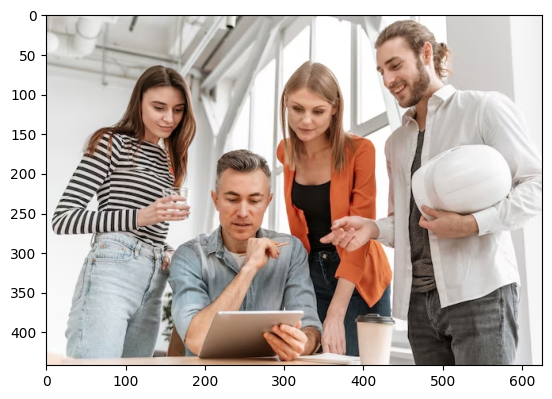

In [2]:
img_people = cv2.imread('images/pessoas_conversando.jpg')
img_people = cv2.cvtColor(img_people, cv2.COLOR_BGR2RGB)

plt.imshow(img_people)

**Convertendo a imagem para escala de cinza**

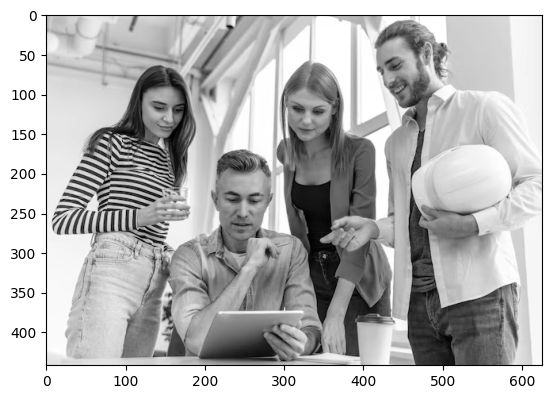

In [3]:
img_gray = cv2.cvtColor(img_people, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

Classificador de rostos frontais

**OBS.**
Este classificador terá dificuldades para identificar rostos de lado, por exemplo.

In [4]:
import cv2.data

classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

**Parametros da função:**

- O **2° parâmetro** da função *detecMultiScale* é a escala.
    - Dado uma imagem, iremos diminuir até o limite do modelo que foi construído.
    - Basicamente, antes de realizar a detecção, a imagem será diminuída para fazer a classificação.
- O **3° parâmetro** da função seria um valor que significa o **número mínimo de características vizinhas que irá considerar** (**por padrão é 5**).
  

Quanto **menor o valor** destes dois parâmetros, será mais propenso a **identificar mais rostos**, porém pode ser que ele **identifique rostos onde não há**.

Quanto **maior o valor** destes dois parâmetros, será mais **díficil de identificar rostos**.

**O ideal**

O ideal é utilizar valores intermediários, como 1,1 (10%). Isto equilibra a execução do modelo em tempo real e minimiza efeitos de falsos positivos (identificar rostos onde não há).

**OBS.** Os valores devem ser maiores que 1.


In [5]:
faces = classifier.detectMultiScale(img_gray, scaleFactor=1.3, minNeighbors=6) # 30% de redução na imagem

print('Faces identificadas: ', len(faces))

Faces identificadas:  3


Temos um **array bi-dimensional** que se referem as **coordenadas** onde poderemos fazer um retângulo na face

2 primeiros itens do array:
- X e Y

2 últimos números:
- largura e altura (width e height)

In [6]:
faces

array([[119,  94,  65,  65],
       [296,  96,  69,  69],
       [207, 201,  84,  84]], dtype=int32)

### Detectando rostos na imagem

Iremos desenhar retângulos baseado nas posições retornadas pela função *detectMultiScale*.

In [7]:
# Criando uma cópia da imagem original
img_result = img_people.copy()

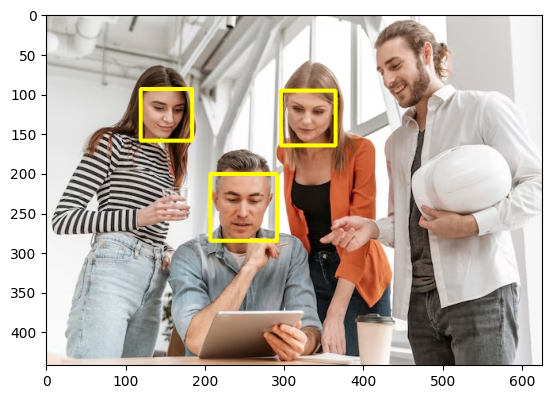

In [8]:
for (x, y, w, h) in faces:                      
    cv2.rectangle(img_result, # Imagem que será desenhada
                  (x, y), # Coordenadas
                  (x + w, y + h), # Soma x + largura e y + altura
                  (255,255,0), # Cor do retângulo
                  thickness=4) # Espessura das linhas do retângulo
    
plt.imshow(img_result)

**Recortando e exportando os rostos**

In [9]:
face_count = 1
for (x, y, w, h) in faces:
    # Recortando a região da face
    face = img_people[y:y+h, x:x+w]

    # Convertendo para BGR
    img_roi_bgr = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)

    # Salvando a imagem
    cv2.imwrite(f'faces/face_{face_count}.jpg', img_roi_bgr)

    face_count += 1

**Exibindo os rostos com matplotlib**

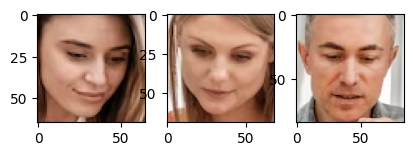

In [10]:
index = 0
for (x, y, w, h) in faces:
    plt.subplot(2, 4, index+1)

    face = img_people[y:y+h, x:x+w]

    plt.imshow(face)
    index += 1

### Identificando várias faces

Preparando e exibindo a imagem.

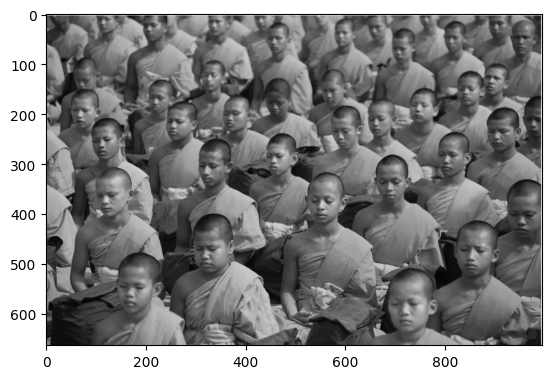

In [11]:
img_monges = cv2.imread('images/monges.jpg')
img_monges_rgb = cv2.cvtColor(img_monges, cv2.COLOR_BGR2RGB)

img_monges_gray = cv2.cvtColor(img_monges, cv2.COLOR_BGR2GRAY)

plt.imshow(img_monges_gray, cmap='gray')

Detectando os rostos dos monges

**OBS.**
Para maximizarmos a identificação dos rostos dos monges, precisamos diminuir a escala (scaleImage), ou seja, a cada etapa irá diminuir a imagem, porém em pequenos valores, no caso, 10%.

In [12]:
monges = classifier.detectMultiScale(img_monges_gray, 1.1, 5)

Exibindo os rostos detectados

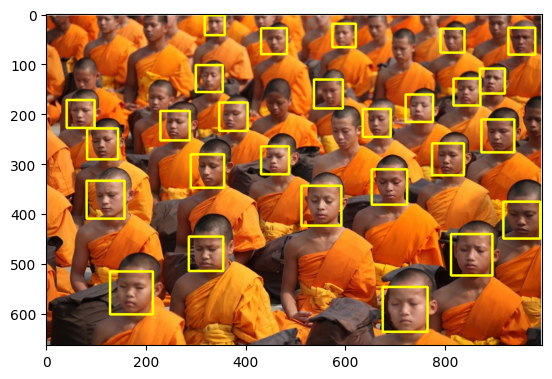

In [13]:
for (x, y, w, h) in monges:
    cv2.rectangle(img_monges_rgb, (x, y), (x+w, y+h), (255,255,0), thickness=4)

plt.imshow(img_monges_rgb)